In [13]:

!unzip Telecom_Subscriptions.zip -d /content/Telecom_Data



Archive:  Telecom_Subscriptions.zip
replace /content/Telecom_Data/metadata.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [45]:
df = pd.read_csv("/content/Telecom_Data/year-month-circle-and-service-provider-wise-number-of-subscriptions-to-wireline-and-wireless-telecom-services-in-india.csv")

In [46]:
df.head()

,year,month,circle,type_of_connection,service_provider,value,unit,notes
0,2025,April,Andhra Pradesh,wireless,Bharti Airtel (Including Tata Tele.),33965795,value in absolute number,NaN
1,2025,April,Assam,wireless,Bharti Airtel (Including Tata Tele.),12314102,value in absolute number,NaN
2,2025,April,Bihar,wireless,Bharti Airtel (Including Tata Tele.),40967773,value in absolute number,NaN
3,2025,April,Delhi,wireless,Bharti Airtel (Including Tata Tele.),18877637,value in absolute number,NaN
4,2025,April,Gujarat,wireless,Bharti Airtel (Including Tata Tele.),12401101,value in absolute number,NaN


In [47]:
df.shape

(70728, 8)

In [48]:
#Duplicates
df.duplicated().sum()

np.int64(0)

In [49]:
df['service_provider'].value_counts()

,count
service_provider,
BSNL,8650
Bharti Airtel,7391
Reliance Communications,5997
MTNL,5647
Vodafone,4064
Reliance Jio,3772
Vodafone Idea,3325
Tata Teleservices,2936
Idea,2682


In [50]:
df['circle'].value_counts()

,count
circle,
All India,3499
Punjab,3252
Rajasthan,3193
Delhi,3137
Mumbai,3134
Gujarat,3102
Kolkata,3102
Maharashtra,3102
Karnataka,3102


In [51]:
df['type_of_connection'].value_counts()

,count
type_of_connection,
wireless,47465
wireline,23263


In [52]:

df['service_provider'] = df['service_provider'].str.upper().str.strip()
df['circle'] = df['circle'].str.title().str.strip()
df['type_of_connection'] = df['type_of_connection'].str.lower().str.strip()

In [53]:
#Missing values
df.isnull().sum()/len(df)*100

,0
year,0.000000
month,0.000000
circle,0.000000
type_of_connection,0.000000
service_provider,0.000000
value,17.435810
unit,0.000000
notes,99.277514


In [54]:
df['value'] = df['value'].fillna(method='ffill')

In [55]:
#Encoding
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['value'] = pd.to_numeric(df['value'], errors='coerce')

In [56]:
df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1), errors='coerce')

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70728 entries, 0 to 70727
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   year                70728 non-null  int64         
 1   month               70728 non-null  object        
 2   circle              70728 non-null  object        
 3   type_of_connection  70728 non-null  object        
 4   service_provider    70728 non-null  object        
 5   value               70657 non-null  float64       
 6   unit                70728 non-null  object        
 7   notes               511 non-null    object        
 8   date                0 non-null      datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 4.9+ MB


In [58]:
df = df.sort_values(['service_provider', 'circle', 'date'])
df['subscriber_change'] = df.groupby(['service_provider', 'circle'])['value'].pct_change()

In [59]:
df['churn_flag'] = (df['subscriber_change'] < -0.15).astype(int)

In [31]:
df

,year,month,circle,type_of_connection,service_provider,value,unit,notes,date,subscriber_change,churn_flag
13914,2018,April,All India,wireless,AIRCEL,0.0,value in absolute number,NaN,NaT,NaN,0
14144,2018,March,All India,wireless,AIRCEL,74152299.0,value in absolute number,NaN,NaT,inf,0
14374,2018,February,All India,wireless,AIRCEL,78924682.0,value in absolute number,NaN,NaT,0.064359,0
14604,2018,January,All India,wireless,AIRCEL,81442905.0,value in absolute number,NaN,NaT,0.031907,0
14834,2017,December,All India,wireless,AIRCEL,84934658.0,value in absolute number,NaN,NaT,0.042874,0
...,...,...,...,...,...,...,...,...,...,...,...
57536,2019,June,West Bengal,wireline,VODAFONE IDEA,120.0,value in absolute number,NaN,NaT,0.000000,0
57640,2019,July,West Bengal,wireline,VODAFONE IDEA,120.0,value in absolute number,NaN,NaT,0.000000,0
57957,2019,December,West Bengal,wireline,VODAFONE IDEA,120.0,value in absolute number,NaN,NaT,0.000000,0
58084,2019,August,West Bengal,wireline,VODAFONE IDEA,120.0,value in absolute number,NaN,NaT,0.000000,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70728 entries, 13914 to 58188
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   year                70728 non-null  int64         
 1   month               70728 non-null  int64         
 2   circle              70728 non-null  object        
 3   type_of_connection  70728 non-null  int64         
 4   service_provider    70728 non-null  int64         
 5   value               70657 non-null  float64       
 6   unit                70728 non-null  object        
 7   notes               511 non-null    object        
 8   date                0 non-null      datetime64[ns]
 9   subscriber_change   64581 non-null  float64       
 10  churn_flag          70728 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(3)
memory usage: 6.5+ MB


In [60]:
df['circle'] = df['circle'].replace({
    'Uttaranchal': 'Uttarakhand',
    'Chattisgarh': 'Chhattisgarh',
    'Andaman and Nicobar': 'Andaman and Nicobar Islands',
    'All india': 'All India',
    'Tamil Nadu (including Chennai)': 'Tamil Nadu',
    'North East1': 'North East',
    'North East2': 'North East'
})


In [61]:
circle_counts = df['circle'].value_counts()
small_circles = circle_counts[circle_counts < 50].index
df['circle'] = df['circle'].replace(small_circles, 'Other')


In [62]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['circle'] = le.fit_transform(df['circle'])


In [63]:
df['service_provider'] = df['service_provider'].replace({
    'Bharti Airtel (Including Tata Tele.)': 'Bharti Airtel',
    'Bharti Airtel (including Tata Telecommunications)': 'Bharti Airtel',
    'Sistema Shyam Teleservices Ltd': 'Sistema',
    'Systema Shyam Teleservices Ltd.': 'Sistema',
    'Tata Teleservices': 'Tata',
    'Tata Telecommunication': 'Tata',
    'Idea/Spice': 'Idea'
})


In [64]:
provider_counts = df['service_provider'].value_counts()
small_providers = provider_counts[provider_counts < 50].index
df['service_provider'] = df['service_provider'].replace(small_providers, 'Other')


In [65]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['service_provider'] = le.fit_transform(df['service_provider'])


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70728 entries, 13914 to 58188
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   year                70728 non-null  int64         
 1   month               70728 non-null  object        
 2   circle              70728 non-null  int64         
 3   type_of_connection  70728 non-null  object        
 4   service_provider    70728 non-null  int64         
 5   value               70657 non-null  float64       
 6   unit                70728 non-null  object        
 7   notes               511 non-null    object        
 8   date                0 non-null      datetime64[ns]
 9   subscriber_change   64581 non-null  float64       
 10  churn_flag          70728 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 6.5+ MB


In [67]:
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['value'] = pd.to_numeric(df['value'], errors='coerce')

In [68]:
df['date'] = pd.to_datetime(df[['year', 'month']].assign(day=1), errors='coerce')

In [69]:
df = df.sort_values(['service_provider', 'circle', 'date'])
df['subscriber_change'] = df.groupby(['service_provider', 'circle'])['value'].pct_change()

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70728 entries, 13914 to 58188
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   year                70728 non-null  int64         
 1   month               70728 non-null  object        
 2   circle              70728 non-null  int64         
 3   type_of_connection  70728 non-null  object        
 4   service_provider    70728 non-null  int64         
 5   value               70657 non-null  float64       
 6   unit                70728 non-null  object        
 7   notes               511 non-null    object        
 8   date                0 non-null      datetime64[ns]
 9   subscriber_change   64622 non-null  float64       
 10  churn_flag          70728 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 6.5+ MB


In [ ]:
# Remove commas and convert to numeric
# Keep only digits
df['value'] = df['value'].str.replace(r'[^0-9]', '', regex=True)



In [71]:
df['month'] = df['month'].str.title()  # e.g., april → April
df['type_of_connection'] = df['type_of_connection'].str.title()



In [73]:
from sklearn.preprocessing import LabelEncoder

# Identify columns that are still of object type
categorical_cols_to_encode = df.select_dtypes(include='object').columns

for col in categorical_cols_to_encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70728 entries, 13914 to 58188
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   year                70728 non-null  int64         
 1   month               70728 non-null  int64         
 2   circle              70728 non-null  int64         
 3   type_of_connection  70728 non-null  int64         
 4   service_provider    70728 non-null  int64         
 5   value               70657 non-null  float64       
 6   unit                70728 non-null  int64         
 7   notes               70728 non-null  int64         
 8   date                0 non-null      datetime64[ns]
 9   subscriber_change   64622 non-null  float64       
 10  churn_flag          70728 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(8)
memory usage: 6.5 MB


In [75]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np

X = df[['value', 'subscriber_change']].replace([np.inf, -np.inf], 0).fillna(0)
y = df['churn_flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

<Axes: >

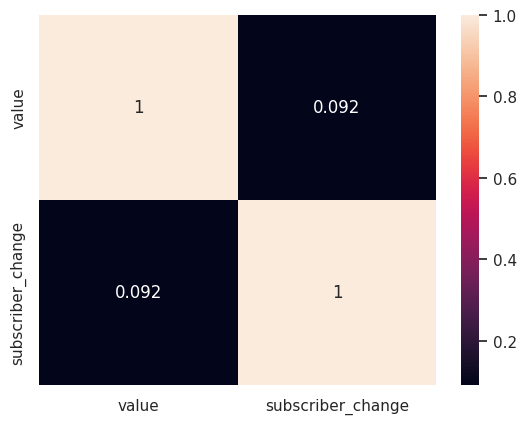

In [78]:
import seaborn as sns
sns.heatmap(X_train.corr(), annot=True)

In [107]:
# Check correlation between features and target
import pandas as pd

corr = pd.concat([X_train, y_train], axis=1).corr()
print(corr[y_train.name].sort_values(ascending=False))


churn_flag            1.000000
service_provider      0.040006
type_of_connection    0.032471
circle                0.014055
subscriber_change    -0.001983
month                -0.017508
year                 -0.044273
value                -0.062708
Name: churn_flag, dtype: float64


In [77]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#model building
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [79]:
# Evaluation
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

In [80]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96     13087
           1       0.00      0.00      0.00      1059

    accuracy                           0.93     14146
   macro avg       0.46      0.50      0.48     14146
weighted avg       0.86      0.93      0.89     14146

ROC-AUC Score: 0.8056290389882252


In [81]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9251378481549555


In [84]:
# Assuming your dataframe is df and target column is 'churn_flag'
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
X = df.drop(['churn_flag', 'date'], axis=1) # Drop 'date' column
y = df['churn_flag']

# Handle infinite values and NaNs in X
X = X.replace([np.inf, -np.inf], np.nan).fillna(X.median())


# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optional: Standardize numerical features
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# Logistic Regression
log_reg = LogisticRegression(max_iter=500, C=0.8)  # Reduce C to avoid overfitting
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", acc_lr)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.9465573306941891
Confusion Matrix:
 [[13390     0]
 [  756     0]]


In [ ]:
##RandomForest

In [108]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (56582, 7)
Test shape: (14146, 7)


In [109]:
import numpy as np
y_shuffled = np.random.permutation(y)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_shuffled, test_size=0.2, random_state=42
)

rf = RandomForestClassifier(max_depth=5, random_state=42)
rf.fit(X_train, y_train)
print("Accuracy on shuffled target:", rf.score(X_test, y_test))


Accuracy on shuffled target: 0.944719355294783
